# Price Prediction of used Cars or MotorCycles

We got this used cars data from website
- This dataset contains information about used cars.
- This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
- The columns in the given dataset are as follows:

name,
year,
selling_price,
km_driven,
fuel,
seller_type,
transmission,
Owner

For used motorcycle datasets please go to https://www.kaggle.com/nehalbirla/motorcycle-dataset

- Creating Model to Predict Selling price of used cars by using below cars dataset which contain km driven, seller type, owner, year and fuel parameters.

# Importing required libraries for the project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Loading used cars dataset from git hub account

In [ ]:
Realdf = pd.read_csv('https://raw.githubusercontent.com/Manju410/MLPractice/main/Car_Sell_Prediction/CARDETAILSFROMCARDEKHO.csv')

In [ ]:
Realdf.tail(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4330,Tata Indica Vista Aqua 1.4 TDI,2010,150000,130000,Diesel,Individual,Manual,Second Owner
4331,Ford EcoSport 1.5 TDCi Titanium BSIV,2015,530000,175000,Diesel,Individual,Manual,Third Owner
4332,Mahindra Scorpio S2 7 Seater,2015,750000,120000,Diesel,Individual,Manual,First Owner
4333,Maruti Ritz VDi,2012,225000,90000,Diesel,Individual,Manual,Second Owner
4334,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2012,600000,170000,Diesel,Individual,Manual,First Owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


- Number of rows and columns in the dataset

In [ ]:
Realdf.shape

(4340, 8)

- Above data set contains 4340 rows and 8 columns.

In [ ]:
Realdf.name.value_counts()

Maruti Swift Dzire VDI              69
Maruti Alto 800 LXI                 59
Maruti Alto LXi                     47
Maruti Alto LX                      35
Hyundai EON Era Plus                35
                                    ..
Hyundai Santro Xing GL PLUS CNG      1
Maruti Ertiga SHVS LDI               1
Mahindra Xylo E4 8S                  1
Mahindra Supro VX 8 Str              1
Hyundai Grand i10 Asta Option AT     1
Name: name, Length: 1491, dtype: int64

- Information about dataset like datatype,count etc

In [ ]:
Realdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# summary of above output
- Above Dataset contains 8 columns.
- 3 columns are integer datatype and 5 columns are object datatype.
- Above Dataset doesnot have any missing values or null values.
- Cars dataset contains total 4340 entries.

- Checking null values in dataset

In [ ]:
Realdf.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

- Extract Train Test Dataset

- X variable contain all the columns in cars dataset execpt selling price column.
- y variable contain selling price values. it is reshaped to 2 dimensional array.

In [ ]:
X = Realdf.iloc[:,[1,3,4,5,6,7]]
y = Realdf['selling_price'].values.reshape(-1,1)

In [ ]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,Petrol,Individual,Manual,First Owner
1,2007,50000,Petrol,Individual,Manual,First Owner
2,2012,100000,Diesel,Individual,Manual,First Owner
3,2017,46000,Petrol,Individual,Manual,First Owner
4,2014,141000,Diesel,Individual,Manual,Second Owner


- Converting y values to 2 dimensional array

In [ ]:
X.shape,y.shape

((4340, 6), (4340, 1))

# converting Year and km_driven from 0 to 1 using normalization and standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscaler = MinMaxScaler()

In [ ]:
Categ = X.columns[[0,1]]
Categ

Index(['year', 'km_driven'], dtype='object')

In [ ]:
scaler = mmscaler.fit(X[Categ])

In [ ]:
scaler.data_min_

array([1.992e+03, 1.000e+00])

In [ ]:
scaler.data_max_

array([  2020., 806599.])

In [ ]:
X.describe()

,year,km_driven
count,4340.000000,4340.000000
mean,2013.090783,66215.777419
std,4.215344,46644.102194
min,1992.000000,1.000000
25%,2011.000000,35000.000000
50%,2014.000000,60000.000000
75%,2016.000000,90000.000000
max,2020.000000,806599.000000


In [ ]:
scaled = scaler.transform(X[Categ])
scaled[:5]

array([[0.53571429, 0.08678301],
       [0.53571429, 0.06198751],
       [0.71428571, 0.12397626],
       [0.89285714, 0.05702841],
       [0.78571429, 0.17480703]])

In [ ]:
X_scaled = pd.DataFrame(scaled,columns=Categ)
X_scaled.head()

,year,km_driven
0,0.535714,0.086783
1,0.535714,0.061988
2,0.714286,0.123976
3,0.892857,0.057028
4,0.785714,0.174807


In [ ]:
X_scaled.describe()

,year,km_driven
count,4340.000000,4340.000000
mean,0.753242,0.082091
std,0.150548,0.057828
min,0.000000,0.000000
25%,0.678571,0.043391
50%,0.785714,0.074385
75%,0.857143,0.111579
max,1.000000,1.000000


In [ ]:
X.columns[5]

'owner'

In [ ]:
X_scaled.insert(2,X.columns[2],X[X.columns[2]])
X_scaled.insert(3,X.columns[3],X[X.columns[3]])
X_scaled.insert(4,X.columns[4],X[X.columns[4]])
X_scaled.insert(5,X.columns[5],X[X.columns[5]])

In [ ]:
X_scaled.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,0.535714,0.086783,Petrol,Individual,Manual,First Owner
1,0.535714,0.061988,Petrol,Individual,Manual,First Owner
2,0.714286,0.123976,Diesel,Individual,Manual,First Owner
3,0.892857,0.057028,Petrol,Individual,Manual,First Owner
4,0.785714,0.174807,Diesel,Individual,Manual,Second Owner


# converting categorical values to Numerical using python basic functions like unique, for loop etc

In [ ]:
#name = X.name.unique().tolist()

In [ ]:
fuel = X.fuel.unique().tolist()
fuel

['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric']

In [ ]:
seller = X.seller_type.unique().tolist()
seller

['Individual', 'Dealer', 'Trustmark Dealer']

In [ ]:
trmsion = X.transmission.unique().tolist()
trmsion

['Manual', 'Automatic']

In [ ]:
owner = X.owner.unique().tolist()
owner

['First Owner',
 'Second Owner',
 'Fourth & Above Owner',
 'Third Owner',
 'Test Drive Car']

- Assign numerical values to each category

In [ ]:
#namenum = {nm:count for count,nm in enumerate(name)}

In [ ]:
fuelnum = {name:count for count,name in enumerate(fuel)}
fuelnum

{'CNG': 2, 'Diesel': 1, 'Electric': 4, 'LPG': 3, 'Petrol': 0}

In [ ]:
sellernum = {name:count for count,name in enumerate(seller)}
sellernum

{'Dealer': 1, 'Individual': 0, 'Trustmark Dealer': 2}

In [ ]:
trnsmnnum = {name:count for count,name in enumerate(trmsion)}
trnsmnnum

{'Automatic': 1, 'Manual': 0}

In [ ]:
ownernum = {name:count for count,name in enumerate(owner)}
ownernum

{'First Owner': 0,
 'Fourth & Above Owner': 2,
 'Second Owner': 1,
 'Test Drive Car': 4,
 'Third Owner': 3}

- Concatnating above dictionaries to single dictionary

In [ ]:
catnums = { **fuelnum ,**sellernum , **trnsmnnum, **ownernum }

- Catcols list contain only object datatype column names

In [ ]:
catcols = X.dtypes[X.dtypes =='object'].index.tolist()
catcols

['fuel', 'seller_type', 'transmission', 'owner']

- Assigning numbers to the object datatype columns using above dictionaries and applymap function

In [ ]:
X[catcols].applymap(lambda x :catnums.get(x)).head()

,fuel,seller_type,transmission,owner
0,0,0,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,1,0,0,1


In [ ]:
X.loc[:,catcols] = X[catcols].applymap(lambda x :catnums.get(x))
X.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1


In [ ]:
X.fuel.value_counts()

1    2153
0    2123
2      40
3      23
4       1
Name: fuel, dtype: int64

# converting categorical values to Numerical using dummy values

In [ ]:
X.fuel.unique()

array([0, 1, 2, 3, 4])

- Assigning numbers to each category using get dummies funtion from pandas module

In [ ]:
#nmedf = pd.get_dummies(X.name, prefix='nme')

In [ ]:
fuldf = pd.get_dummies(X.fuel,prefix='ful')

In [ ]:
selldf = pd.get_dummies(X.seller_type,prefix='sell')

In [ ]:
trndf = pd.get_dummies(X.transmission,prefix='trn')

In [ ]:
owndf = pd.get_dummies(X.owner,prefix='own')

- concatination aboce dataframes into one single pdf3 dataframe using pd.concat

In [ ]:
pdf3 = pd.concat([X_scaled, fuldf,selldf,trndf,owndf], axis=1)

- using get dummies function we created new prefix columns in X dataframe so there is no need to name, fuel, seller, transmission , owner columns so droping them
- inplace =true will modify existing dataframe

In [ ]:
pdf3.drop(columns=['fuel','seller_type','transmission','owner'], axis=1, inplace=True)
pdf3.head()

,year,km_driven,ful_0,ful_1,ful_2,ful_3,ful_4,sell_0,sell_1,sell_2,trn_0,trn_1,own_0,own_1,own_2,own_3,own_4
0,0.535714,0.086783,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0.535714,0.061988,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,0.714286,0.123976,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
3,0.892857,0.057028,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,0.785714,0.174807,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0


# Spliting data to train and test lists

- importing train test split from sklearn model selection module
- test size =0.25 : 25% of test data and 75% of train data using from X,y
- randomstate = 1234 : every time when model executed will use same batch to predict and training.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(pdf3,y,test_size=0.25,random_state=1234)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3255, 17), (1085, 17), (3255, 1), (1085, 1))

In [ ]:
X_train.head()

,year,km_driven,ful_0,ful_1,ful_2,ful_3,ful_4,sell_0,sell_1,sell_2,trn_0,trn_1,own_0,own_1,own_2,own_3,own_4
2567,0.821429,0.086783,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
3531,0.678571,0.278504,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
1946,0.857143,0.061988,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
2813,0.785714,0.136374,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
2221,0.750000,0.099181,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [ ]:
X_test.head()

,year,km_driven,ful_0,ful_1,ful_2,ful_3,ful_4,sell_0,sell_1,sell_2,trn_0,trn_1,own_0,own_1,own_2,own_3,own_4
3866,0.892857,0.048624,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
909,0.821429,0.056996,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0
1866,0.500000,0.148772,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
1532,0.714286,0.061988,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
1028,0.821429,0.014774,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0


# Linear Regression Model

- We have to predict selling price of used cars which continuous variable so we are using Linear Regression Model to predict selling price

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Checking intercept and slope for the dataset

In [ ]:
c = lrmodel.intercept_
m = lrmodel.coef_
c,m

(array([-1.62742144e+17]),
 array([[ 9.71976165e+05, -7.85380449e+05,  1.38657563e+17,
          1.38657563e+17,  1.38657563e+17,  1.38657563e+17,
         -7.59197717e+16, -7.01328676e+15, -7.01328676e+15,
         -7.01328676e+15,  3.90206903e+15,  3.90206904e+15,
          2.71957991e+16,  2.71957991e+16,  2.71957991e+16,
          2.71957991e+16,  2.71957991e+16]]))

- Above output giving in exponensial values: to convert into normal values we using below with statement

In [ ]:
with np.printoptions(precision=3, suppress=True):
  print(m,c)

[[ 9.720e+05 -7.854e+05  1.387e+17  1.387e+17  1.387e+17  1.387e+17
  -7.592e+16 -7.013e+15 -7.013e+15 -7.013e+15  3.902e+15  3.902e+15
   2.720e+16  2.720e+16  2.720e+16  2.720e+16  2.720e+16]] [-1.627e+17]


- above are the slope and intercept of each columns

In [ ]:
Realdf.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

- Prdecting for X_train to check how model learnt from given data

In [ ]:
y_learntdf = lrmodel.predict(X_train)
y_learntdf[:5]

array([[ 618656.],
       [ 347104.],
       [ 327744.],
       [1389056.],
       [ 539488.]])

- Creating Dataframe for Actual values and model predicted learnt values

In [ ]:
learndf = pd.DataFrame({'Actual':y_train[:,0],'Learnt':y_learntdf[:,0]})
learndf.head()

,Actual,Learnt
0,750000,618656.0
1,500000,347104.0
2,330000,327744.0
3,1150000,1389056.0
4,225000,539488.0


- ploting bar graph to visuialaize actual and learnt values

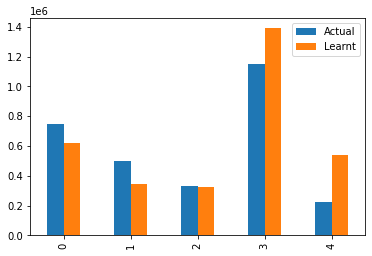

In [ ]:
learndf.head().plot(kind='bar')

- Above Graph shows that how close selling price predicted compare to actual prices.

# importing metrics from sklearn to check mean square error

- We are using metrics to check accuracy of our model.
- Using mean square error we can check how difference between actual and predicted values.

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
train_mse = mse(y_train,y_learntdf)
train_mse

191177613565.08908

In [ ]:
rmse_train = np.sqrt(train_mse)
rmse_train

437238.6231396868

- As per above result we have 197363456921.5813 training mean square error.
- rmse is root mean square minimize the mse value

- predicting for test data set

In [ ]:
testdf = lrmodel.predict(X_test)
testdf[:5]

array([[ 788416.],
       [ 909088.],
       [ 205056.],
       [1378048.],
       [ 649664.]])

In [ ]:
test = pd.DataFrame({'Actual':y_test[:,0],'Pred':testdf[:,0]})
test.head()

,Actual,Pred
0,1260000,788416.0
1,750000,909088.0
2,300000,205056.0
3,1800000,1378048.0
4,625000,649664.0


In [ ]:
test_mse = mse(y_test,testdf)
test_mse

4.2436343412819875e+31

In [ ]:
rmse_test = np.sqrt(test_mse)
rmse_test

6514318338308305.0

- Above values shows that total difference between actual and predicted values for test dataset is 156854673582.88336 - erorr

# R2 score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_real = r2_score(y_test,testdf)
r2_real

-1.516997341053245e+20

- R2 score will tell how much accurate and effecient your model is.
- From above values we can see that our model is 43% accurate results.

In [ ]:
y_mean = Realdf.selling_price.mean()**2
y_mean

254144346453.4433

In [ ]:
n= X.shape[0]
k= X.shape[1]
n,k

(4340, 6)

In [ ]:
Adj_R2 = 1-(((1-r2_real)*(n-1))/(n-k-1))
Adj_R2

-1.5190979604961988e+20